In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [134]:
df_state = pd.read_csv('datos_state.csv', sep=";")
df_state

,Population,Income,Illiteracy,Life_Exp,Murder,HS_Grad,Frost,Area,Density_pob
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,71.290526
1,365,6315,1.5,69.31,11.3,66.7,152,566432,0.644384
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,19.503249
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,40.619886
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,135.570890
5,2541,4884,0.7,72.06,6.8,63.9,166,103766,24.487790
6,3100,5348,1.1,72.48,3.1,56.0,139,4862,637.597696
7,579,4809,0.9,70.06,6.2,54.6,103,1982,292.129163
8,8277,4815,1.3,70.66,10.7,52.6,11,54090,153.022740
9,4931,4091,2.0,68.54,13.9,40.6,60,58073,84.910371


### **Descripcion de los datos**

In [135]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Population   50 non-null     int64  
 1   Income       50 non-null     int64  
 2   Illiteracy   50 non-null     float64
 3   Life_Exp     50 non-null     float64
 4   Murder       50 non-null     float64
 5   HS_Grad      50 non-null     float64
 6   Frost        50 non-null     int64  
 7   Area         50 non-null     int64  
 8   Density_pob  50 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 3.6 KB


Corroboramos que no hayan valores nulos

In [136]:
df_state.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,50.0,4246.420000,4464.491433,365.000000,1079.500000,2838.500000,4968.500000,21198.000000
Income,50.0,4435.800000,614.469939,3098.000000,3992.750000,4519.000000,4813.500000,6315.000000
Illiteracy,50.0,1.170000,0.609533,0.500000,0.625000,0.950000,1.575000,2.800000
Life_Exp,50.0,70.878600,1.342394,67.960000,70.117500,70.675000,71.892500,73.600000
Murder,50.0,7.378000,3.691540,1.400000,4.350000,6.850000,10.675000,15.100000
HS_Grad,50.0,53.108000,8.076998,37.800000,48.050000,53.250000,59.150000,67.300000
Frost,50.0,104.460000,51.980848,0.000000,66.250000,114.500000,139.750000,188.000000
Area,50.0,70735.880000,85327.299622,1049.000000,36985.250000,54277.000000,81162.500000,566432.000000
Density_pob,50.0,149.224473,221.006340,0.644384,25.335165,73.015433,144.282783,975.003324


comparando los datos con la realidad, todo conduerda, no tenemos ceros que afecten nuestro modelo. Podemos trabajarlos asi como están.

**Supuesto de normalidad y Homogeneidad**

In [137]:
def normalidad(data, columna):
    alfa = 0.05
    stat, p_value = stats.shapiro(data[columna])
    if p_value > alfa: # Distribucion normal
        return True 
    else:
        return False # No normal

In [138]:
def varianza(data, *args):
    alfa = 0.05
    stat, p_value = stats.levene(*args)
    if p_value > alfa:
        return True # Varianzas iguales
    else:
        return False # Varianzas diferentes

In [139]:
# Varianza
valor = varianza(df_state, df_state['Population'], df_state['Income'], 
                df_state['Illiteracy'], df_state['Life_Exp'], df_state['Murder'], 
                df_state['HS_Grad'], df_state['Frost'], df_state['Area'], df_state['Density_pob'])
print(f'Presenta homogeneidad de varianza: {valor}')

# Normalidad
print( f"La columna: Life_exp\t presenta normaliadad: {normalidad(df_state, 'Life_Exp')} " )

Presenta homogeneidad de varianza: False
La columna: Life_exp	 presenta normaliadad: True 


Lo podemos observar mas claramente en las siguientes graficas

<Axes: >

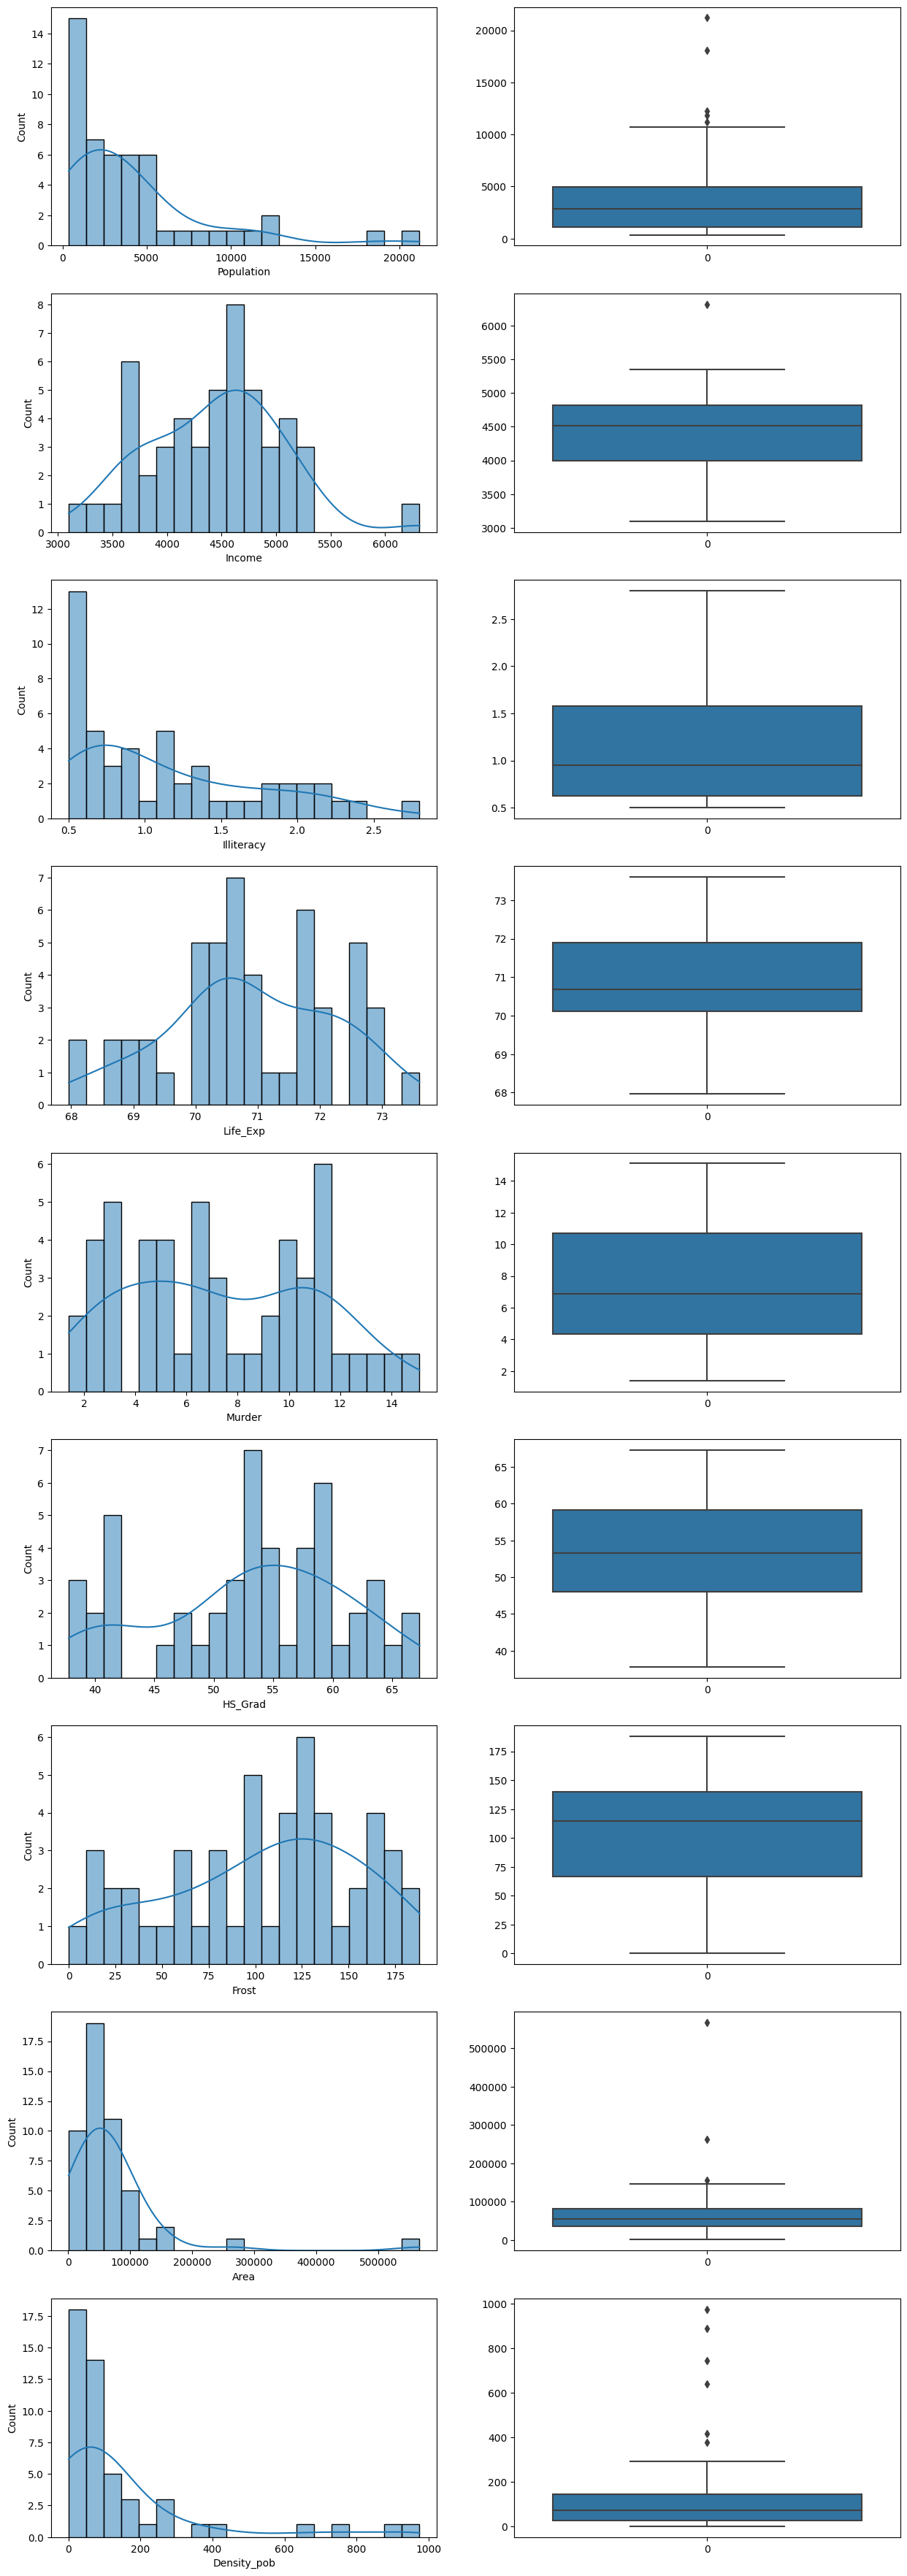

In [140]:
fig, axs = plt.subplots(9, 2, figsize=(15, 45))

# Histogramas

sns.histplot(data=df_state, x='Population', bins=20, kde=True, ax=axs[0, 0], label='Poblacion')
sns.histplot(data=df_state, x='Income', bins=20, kde=True, ax=axs[1, 0], label='Income')
sns.histplot(data=df_state, x='Illiteracy', bins=20, kde=True, ax=axs[2, 0], label='Illiteracy')
sns.histplot(data=df_state, x='Life_Exp', bins=20, kde=True, ax=axs[3, 0], label='Life_Exp')
sns.histplot(data=df_state, x='Murder', bins=20, kde=True, ax=axs[4, 0], label='Murder')
sns.histplot(data=df_state, x='HS_Grad', bins=20, kde=True, ax=axs[5, 0], label='HS_Grad')
sns.histplot(data=df_state, x='Frost', bins=20, kde=True, ax=axs[6, 0], label='Frost')
sns.histplot(data=df_state, x='Area', bins=20, kde=True, ax=axs[7, 0], label='Area')
sns.histplot(data=df_state, x='Density_pob', bins=20, kde=True, ax=axs[8, 0], label='Density_pob')


sns.boxplot(data=df_state['Population'], ax=axs[0, 1])
sns.boxplot(data=df_state["Income"], ax=axs[1, 1])
sns.boxplot(data=df_state["Illiteracy"], ax=axs[2, 1])
sns.boxplot(data=df_state["Life_Exp"], ax=axs[3, 1])
sns.boxplot(data=df_state["Murder"], ax=axs[4, 1])
sns.boxplot(data=df_state["HS_Grad"], ax=axs[5, 1])
sns.boxplot(data=df_state["Frost"], ax=axs[6, 1])
sns.boxplot(data=df_state["Area"], ax=axs[7, 1])
sns.boxplot(data=df_state["Density_pob"], ax=axs[8, 1])

Como se obtuvo que algunas de las columnas no presentan normalidad tienen que normalizarse, lo mismo sucede con la homogeneidad de la varianza

**Remover datos atipicos**

In [141]:
def remove_outliers_iqr(data):
    
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    data = np.where(data>upper_bound, upper_bound, np.where(data<lower_bound,lower_bound,data))
    return data[(data >= lower_bound) & (data <= upper_bound)]

In [142]:
for i in df_state.columns:
    df_state[i] = remove_outliers_iqr(df_state[i])

**Transformacion de nuestros datos**

In [143]:
df_state_test = df_state.apply(lambda x: np.sqrt(x)) 

### **Análisis de regresión**

**1. Variables**:

**Explicada (Y)**: Life_Exp

**Explicatorias (Xi)**: Population, Incom, Illiteracy, Life_Exp, Murder, HS_Grad, Frost, Area, Density_pob
____

**2. Relación entre las variables:**

**-** Determinar visualmente si existe una relación lineal entre las variables

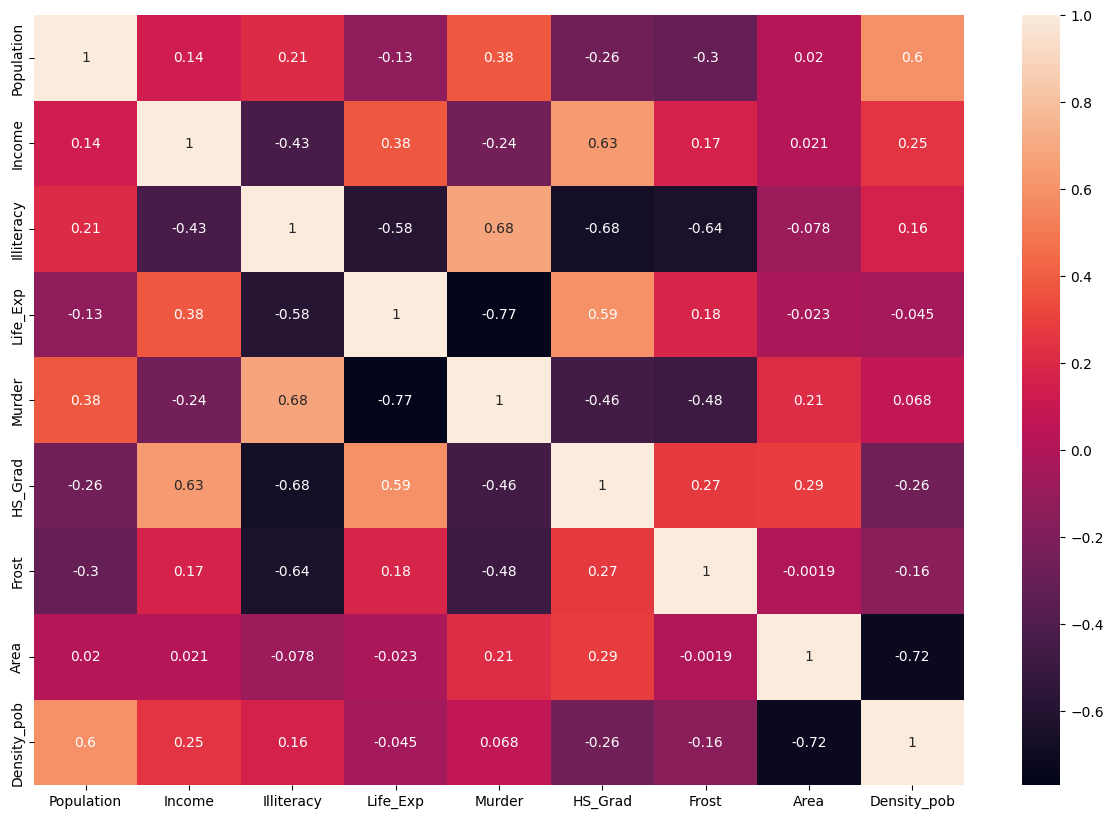

In [144]:
plt.figure(figsize=(15,10))
sns.heatmap(df_state_test.corr(),fmt='.2g',annot=True)
plt.show()

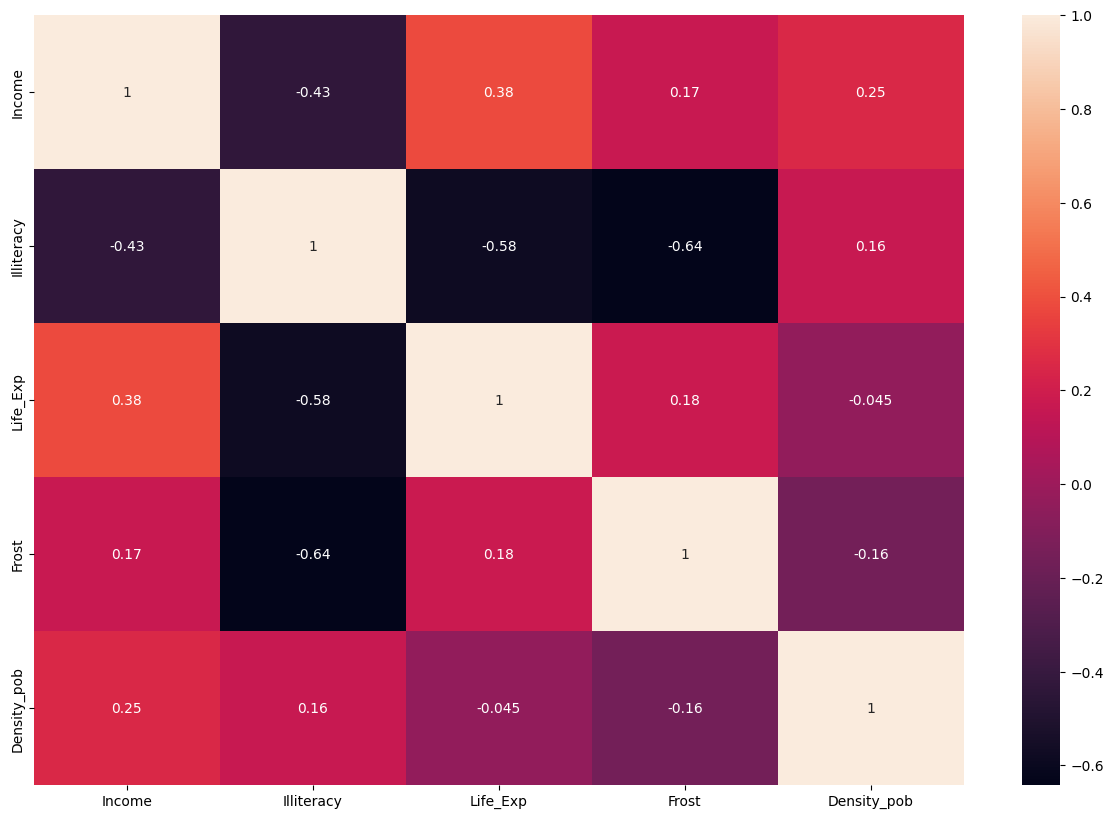

50

In [145]:
df_state_test = df_state_test.drop(['Population', 'Murder', 'Area', 'HS_Grad'], axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(df_state_test.corr(),fmt='.2g',annot=True)
plt.show()

len(df_state_test)

Text(0, 0.5, 'Expectativa de vida')

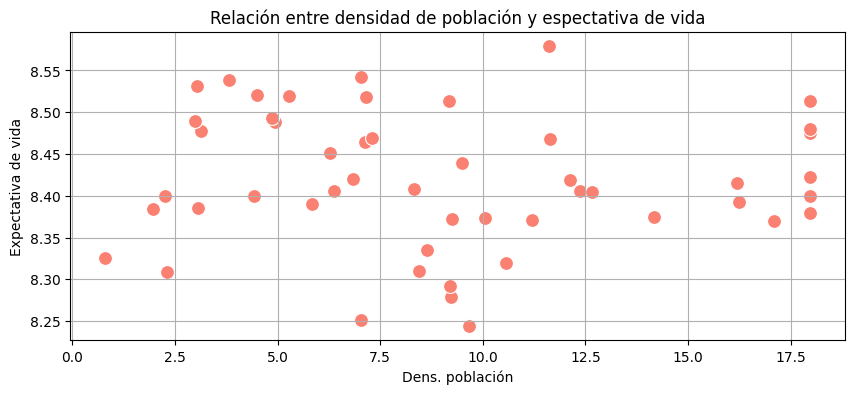

In [146]:
plt.figure(figsize = (10, 4))
plt.grid(True)
sns.scatterplot(x = 'Density_pob', y = 'Life_Exp', s = 100, data = df_state_test, color='salmon')
plt.title('Relación entre densidad de población y espectativa de vida')
plt.xlabel('Dens. población')
plt.ylabel('Expectativa de vida')

### Generacion de modelo

In [147]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import acorr_ljungbox

1. Datos de entrenamiento y prueba

In [148]:
x = df_state_test.drop(columns= ['Life_Exp'])
y = df_state_test['Life_Exp']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

2. Entrenamiento del modelo

In [149]:
#Calculamos el intercepto con el eje y para los datos de entrenamiento
x_train_sm = sm.add_constant(x_train)

#Ajustamos el modelo
lr = sm.OLS(y_train, X_train_sm).fit()

#Calculamos el intercepto con el eje y de los datos de prueba
X_test_sm = sm.add_constant(X_test)

# Predecir los valores de y correspondientes a los valores de x_test_sm
y_pred_test = lr.predict(X_test_sm)
y_pred_train = lr.predict(X_train_sm)

NameError: name 'X_train' is not defined

In [ ]:
print(lr.params)
print(lr.summary())